## Problem Statement
This **dataset** consists of **advertising budgets** for **TV, radio and newspaper media** for **determining the sales of the product**.
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/agency-graphic-300x160.jpeg" width=200 height=140></center>  

Your role as **Data Scientist** is to find: 

- We want to find a function that given input budgets for **Media - TV, radio & newpaper** predeits the output sale.
- Also determine which **media** contributes to **more sales**.
- A **function** for **sales prediction** of a product with respect to **advertising budgets** and **visualize** relationship between **features** and **response**. 
<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/download.jpg" width=260 height=100></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The adverstising dataset captures sales generated with respect to advertisement spends across multiple channles like **radio**, **tv** and **newspaper**.

- The Data can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 200 | 4 | 7.80 KB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **TV** | Spends on TV |
|02| **radio** | Spends on radio | 
|03|**newspaper**|Spends on newspaper|
|04|**sales**|No. of units sold (in Thousands)|

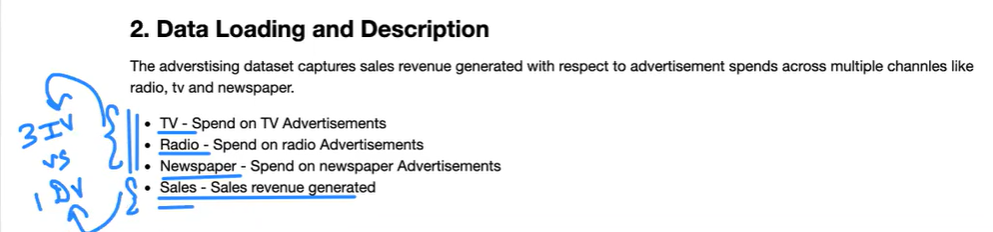

### Importing the DataSet

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col = 0)
data.head()


TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [3]:
data.shape

(200, 4)

In [4]:
data.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

**To see distribution of plot between mean & median**

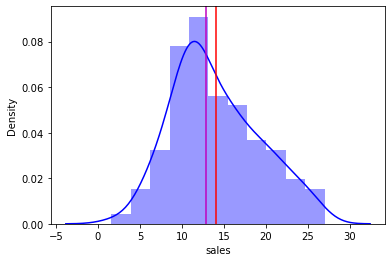

In [5]:
sns.distplot(data.sales, color = 'b')       # we take target variables
plt.axvline(data.sales.mean(), color='r')
plt.axvline(data.sales.median(), color='m')
plt.show()

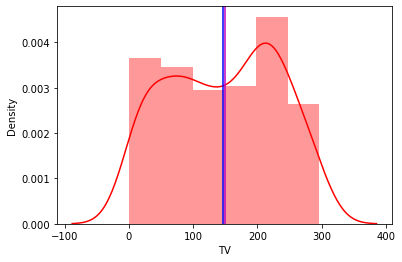

In [6]:
sns.distplot(data.TV, color = 'r')
plt.axvline(data.TV.mean(), color='b')
plt.axvline(data.TV.median(), color='m')
plt.show()

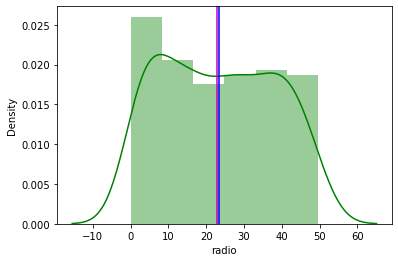

In [7]:
sns.distplot(data.radio, color = 'g')
plt.axvline(data.radio.mean(), color='b')
plt.axvline(data.radio.median(), color='m')
plt.show()

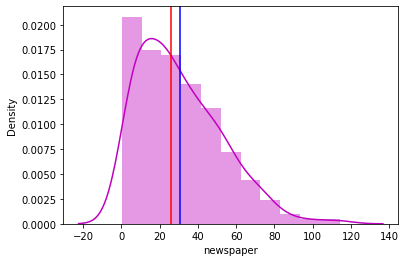

In [8]:
sns.distplot(data.newspaper, color = 'm')
plt.axvline(data.newspaper.mean(), color='b')
plt.axvline(data.newspaper.median(), color='r')
plt.show()

### Check if there is a relationship between sales & various advertising channels

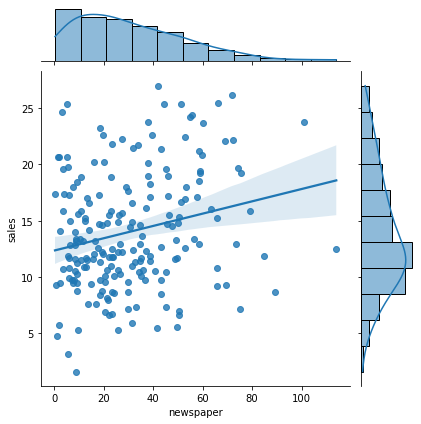

In [9]:
sns.jointplot('newspaper', 'sales',data=data, kind= 'reg')

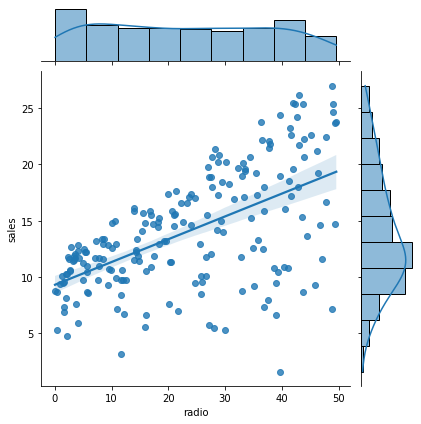

In [10]:
sns.jointplot('radio', 'sales',data=data, kind= 'reg')

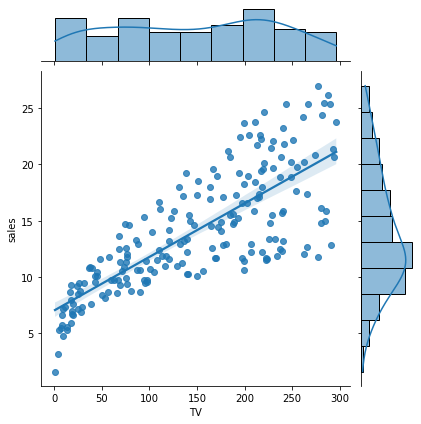

In [11]:
sns.jointplot('TV', 'sales',data=data, kind= 'reg');

### Pair plot visulaization

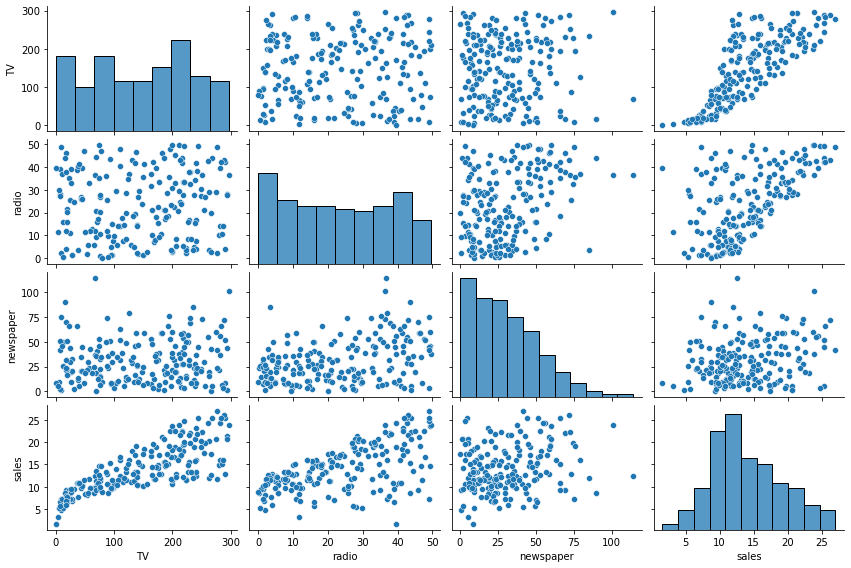

In [12]:
sns.pairplot(data, size=2,aspect=1.5)

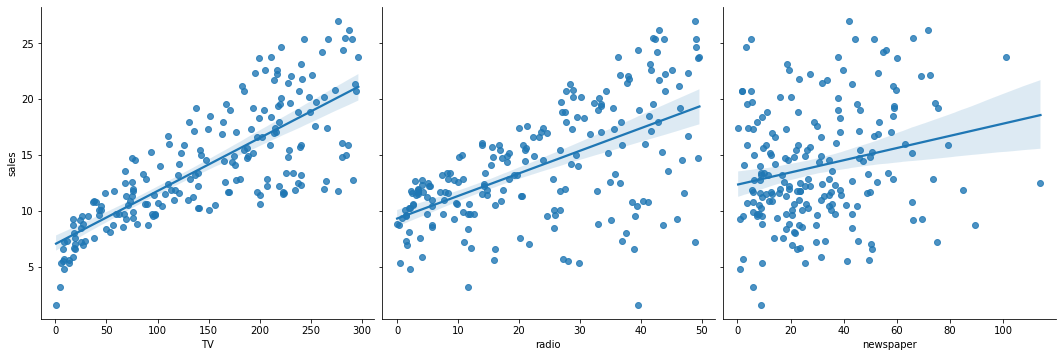

In [13]:
sns.pairplot(data, x_vars= ('TV','radio','newspaper'), y_vars='sales',height=5,aspect=1,kind='reg')

### Date - 27-Nov-21

In [14]:
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

### Calculating and plotting heatmap correlation

In [15]:
x = data.corr()
x

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

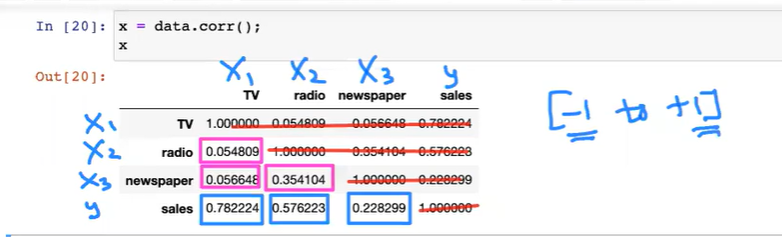

so here, we are checking maximum corerelation b/w **X ~ y (the correlation must be as near to -1 or 1)**. and least correlation b\w **X ~ X (like TV-Radio comes in mid range i.e. not near to -1 or 1)** bcoz this will cause multicollinearity.

The range correlation is [-1 to 1] 

So here there is no multicollinearity.

In such cases if we overcome multicollinearity than drop colm & keep only one col.

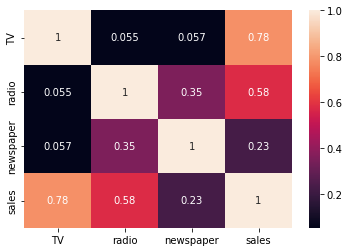

In [16]:
sns.heatmap(data.corr(), annot=True );

### Preparing X and y using Pandas

In [17]:
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

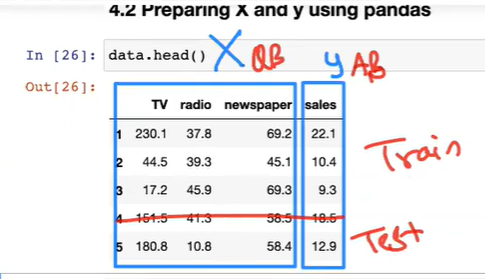

In [18]:
data[['TV','radio','newspaper']]   # this is our X

TV  radio  newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]

In [5]:
feature_cols = ['TV','radio','newspaper']
X = data[feature_cols]

#or 

#X = data[['TV','radio','newspaper']]

In [20]:
X.head()

TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

In [21]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [22]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [6]:
y = data['sales']     # this is our y
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [24]:
print(type(y))
print(y.shape)  # y is a series bcoz it has only 1 column & X is a Dataframe bcox it has more than 1 col.

<class 'pandas.core.series.Series'>
(200,)


### Splitting X and y into training & test datasets

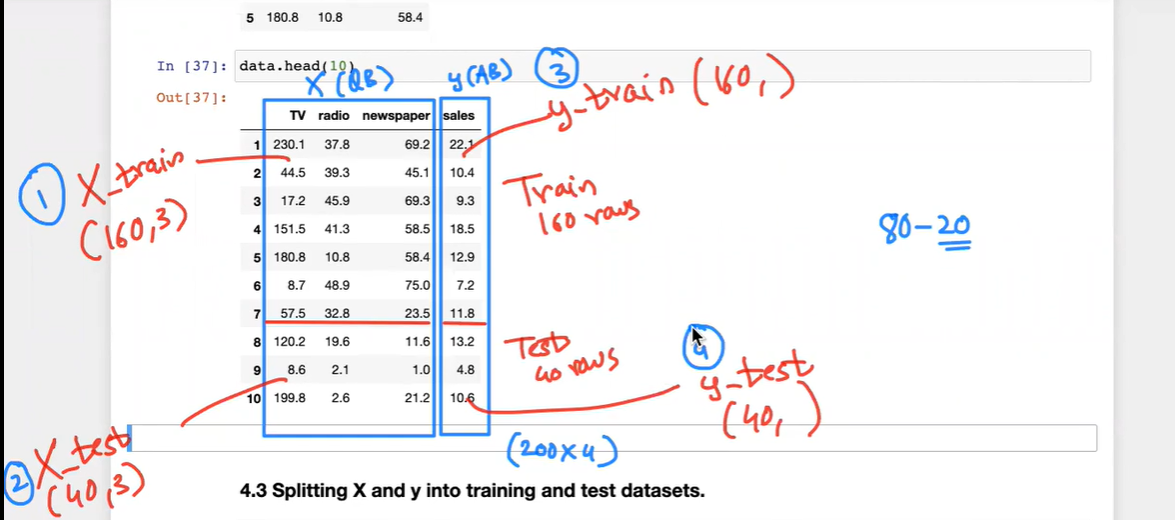

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0) 

# if random state is not set, the shuffle is going to be different.
#random_state is same as seed.

#default test_size = 0.25
#random_state = seedvalue

In [8]:
X_train.head() #0 to 159  i.e 160 Rows

TV  radio  newspaper
135   36.9   38.6       65.6
67    31.5   24.6        2.2
27   142.9   29.3       12.6
114  209.6   20.6       10.7
169  215.4   23.6       57.6

In [9]:
X_test.head()   # 40 rows

TV  radio  newspaper
19    69.2   20.5       18.3
171   50.0   11.6       18.4
108   90.4    0.3       23.2
99   289.7   42.3       51.2
178  170.2    7.8       35.2

In [10]:
y_train.head()

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
Name: sales, dtype: float64

In [11]:
y_train.count()

160

In [12]:
y_test.head()

19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
Name: sales, dtype: float64

In [13]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


In [2]:
import random as rd 
rd.seed(0)       # it re-produces the same result every time executed.
l = [1,2,3,4,5]
print(rd.choice(l))

4


In [3]:
rd.seed(1)
for i in range(100):
    print(rd.choice([1,2,3,4,5]), end = " || ")

2 || 5 || 1 || 3 || 1 || 4 || 4 || 4 || 4 || 2 || 1 || 4 || 1 || 4 || 4 || 5 || 1 || 4 || 3 || 2 || 5 || 1 || 3 || 1 || 1 || 1 || 5 || 1 || 4 || 2 || 4 || 1 || 5 || 2 || 4 || 4 || 5 || 2 || 3 || 2 || 2 || 4 || 3 || 1 || 4 || 5 || 1 || 2 || 3 || 1 || 3 || 5 || 4 || 5 || 2 || 3 || 3 || 5 || 4 || 5 || 4 || 5 || 1 || 4 || 2 || 4 || 4 || 2 || 3 || 5 || 3 || 1 || 4 || 5 || 1 || 2 || 5 || 4 || 3 || 4 || 1 || 4 || 1 || 3 || 5 || 5 || 5 || 4 || 2 || 2 || 5 || 2 || 1 || 2 || 5 || 5 || 2 || 4 || 5 || 3 || 

In [34]:
X_train.describe()

TV       radio   newspaper
count  160.000000  160.000000  160.000000
mean   150.518125   23.388125   30.125625
std     84.957371   14.736240   21.444814
min      4.100000    0.000000    0.900000
25%     76.375000    9.525000   11.675000
50%    157.400000   24.300000   25.900000
75%    220.350000   36.350000   45.100000
max    296.400000   49.600000  100.900000

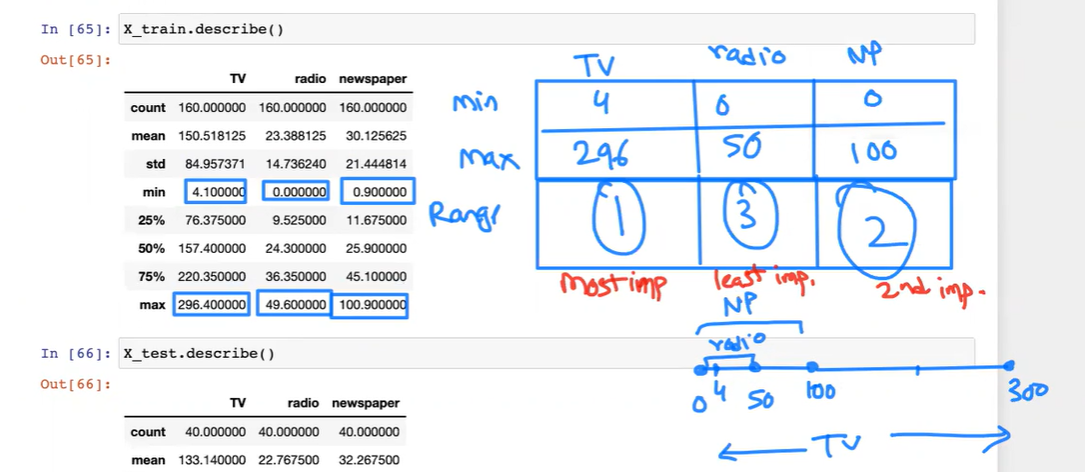

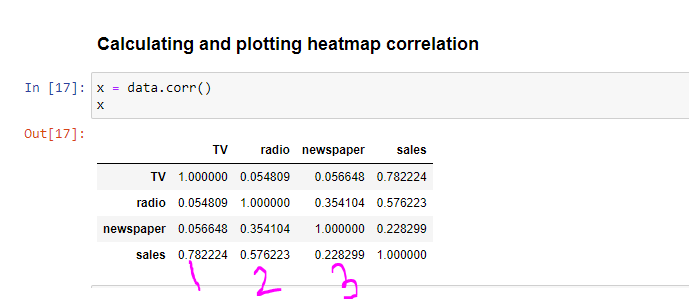

Scalling : propertionately REDUCING everything to make it small.
1. Standard scaler = centers around 0, scale down as small as near 0 to possible, -ve or +ve
2. Minmax = b/w[0 and 1]
3. Robust scaler = (outliers)

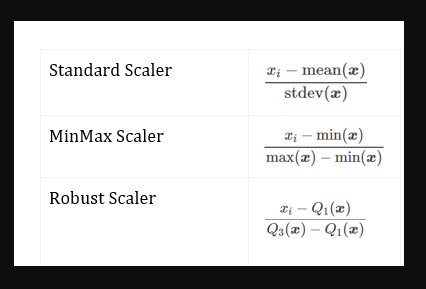

**Its is always a good practice to apply SCALLING on X**

In [14]:
from sklearn.preprocessing import StandardScaler    # import stand scaler

scaler = StandardScaler()                # create a object of scaler
                     # we ask this obj to do - Study on X_train & Give exam on X_train, 
X_train [['TV','radio','newspaper']] = scaler.fit_transform(X_train) # we used fit & transform togther on X-Train

X_test [['TV','radio','newspaper']] = scaler.transform(X_test)  # last step

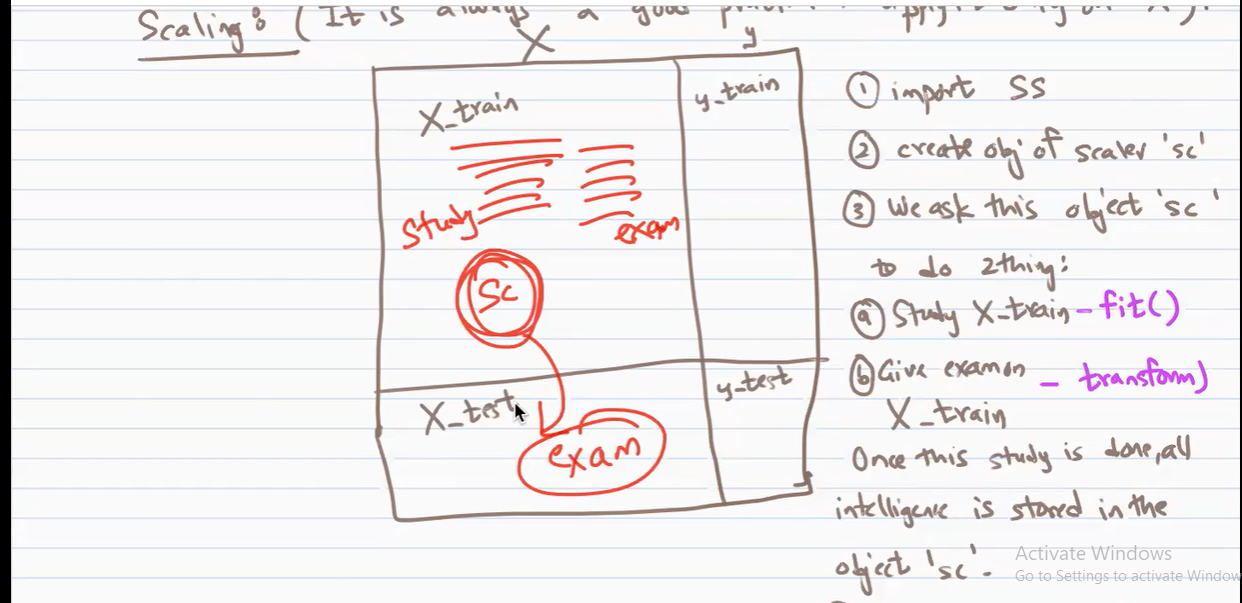

In [15]:
X_train.describe()    # values are scaled

TV         radio     newspaper
count  1.600000e+02  1.600000e+02  1.600000e+02
mean   2.498002e-17 -1.670539e-16 -1.047773e-16
std    1.003140e+00  1.003140e+00  1.003140e+00
min   -1.728842e+00 -1.592099e+00 -1.367108e+00
25%   -8.754498e-01 -9.437042e-01 -8.630784e-01
50%    8.125819e-02  6.207404e-02 -1.976652e-01
75%    8.245444e-01  8.823534e-01  7.004673e-01
max    1.722510e+00  1.784320e+00  3.310665e+00

In [37]:
X_test.head()

TV     radio  newspaper
19  -0.960169 -0.196603  -0.553176
171 -1.186874 -0.802453  -0.548498
108 -0.709849 -1.571677  -0.323965
99   1.643399  1.287388   0.985811
178  0.232395 -1.061130   0.237368

y_train & y_test are not scaled they are original values

### Linear Regression in scikit-learn

Steps :
1. Read CSV
2. EDA
3. get the data into X ~ y
4. Train_test_split = 80:20
5. Scaled fit_transformed   = X_train
    
    transformed X_test
    
    
6. Modeling using Linear Regression

**Scaling has to be done only on X**  --  y scaling is not reqd

Starting with Linear Regression   --   steps very similar to Scaling
1. import LR
2. create obj of LR "lr"
3. Study     - fit()
4. Give Exam  - predict()
5. Evalute using metrics like MAE, MSE, RMSE, R^2, Adjusted R^2 

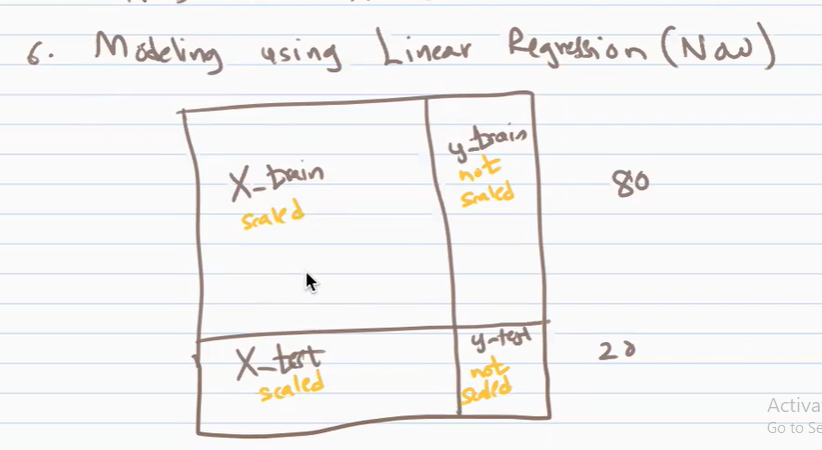

### Modelling

In [16]:
# Train the Algorithm

#import the module
from sklearn.linear_model import LinearRegression

#create a obj of LinearRegression()
regressor = LinearRegression()

#Study on (QB & AB) i.e. fit()
regressor.fit(X_train, y_train)  #fit mean study so go & study on (QB & AB) & 
                                 # regressor has done the study & have all the intelligence

LinearRegression()

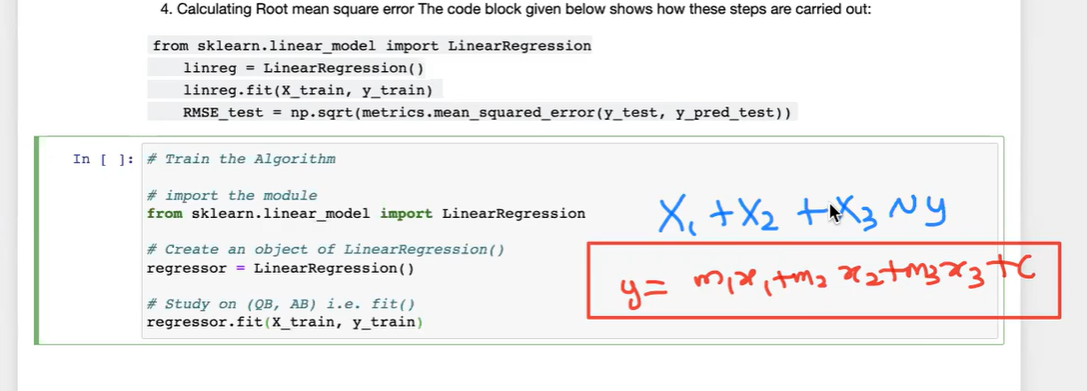

###  Interpreting Model Coefficients**

In [17]:
regressor.intercept_   # gives value of y intercept i.e. its = c

14.217500000000001

In [18]:
regressor.coef_   # beta1, beta2, beta3, is slope/Coefficient i.e. m1, m2, m3

array([ 3.77588591,  2.88656448, -0.05946128])

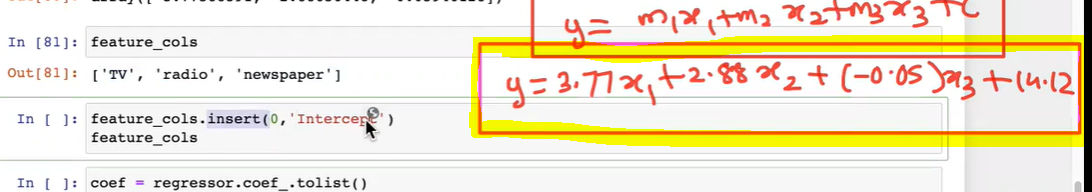

In [19]:
feature_cols

['TV', 'radio', 'newspaper']

In [20]:
feature_cols.insert(0,'Intercept')  # created a new col Intercept at 0 index 
feature_cols

['Intercept', 'TV', 'radio', 'newspaper']

In [21]:
coef = regressor.coef_.tolist()   # converting regressor.coef numpy array to List
coef

[3.7758859111498784, 2.886564482159987, -0.05946128458314684]

In [22]:
coef.insert(0, regressor.intercept_)   # added value of Y intercept in the list
coef

[14.217500000000001,
 3.7758859111498784,
 2.886564482159987,
 -0.05946128458314684]

Its hard to remember the order of the feature names, so we are **zipping** the feature to pair the feature name with the coefficients

In [45]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 14.217500000000001
TV 3.775885911149881
radio 2.8865644821599856
newspaper -0.059461284583147034


**How do we interpret the TV coefficient (_0.77081_)**

- A "unit" increase in TV ad spending is **associated with** a _"0.7708_ unit" increase in Sales.

- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:

- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

###  Using the Model for Prediction**

In [23]:
y_pred_train = regressor.predict(X_train)  # we are giving model X-train and expecting him to predict on y-train

In [24]:
y_pred_test = regressor.predict(X_test)  # In similar way, we are giving model X-test and expecting to predict on y-test

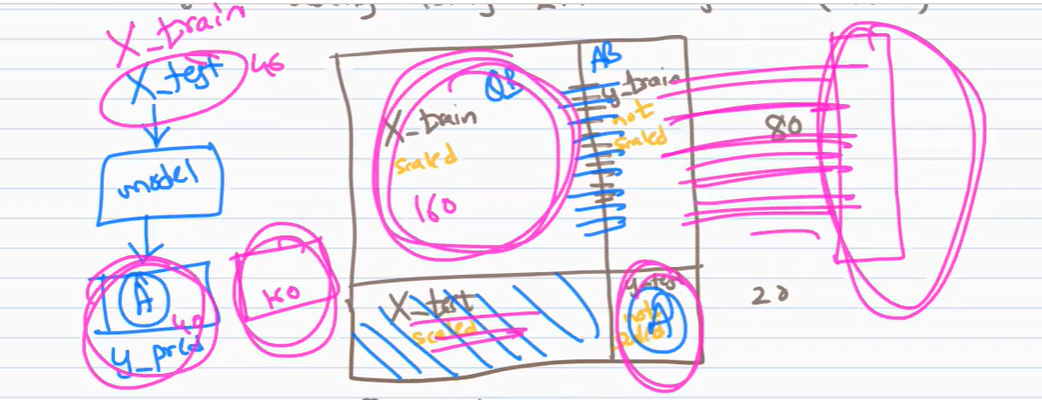

In [48]:
y_pred_train

array([12.04236485,  9.22699748, 15.08826616, 16.35778089, 17.07540865,
       13.36661981,  3.78817791, 12.08662048, 15.62955297,  8.68273227,
       10.61195362, 19.36739522, 18.41226024, 15.30372386, 10.00012405,
        8.19743932, 21.49425935, 14.15684188, 16.3171467 ,  8.72677043,
       15.26881361, 12.47602439, 13.7213733 , 14.20527235, 18.32820674,
       19.11937848, 20.32200442, 17.49488834,  9.34748691, 11.75581878,
       19.85996966,  9.91949478, 20.71025022, 23.06178922, 10.08383292,
       17.13980942, 19.65212394, 18.43129662, 16.91732121, 18.37653406,
       17.10374151,  8.84010201,  9.94425907,  5.38665742,  3.58633703,
       16.63361911, 12.58819659, 18.15954096, 11.77376066, 12.69588564,
       13.79647123,  7.01426813, 16.64772647,  9.79703851,  8.13501333,
       15.71731388, 24.83264798, 10.84564094, 21.15206558, 13.84768418,
       10.64154445,  8.46646573, 12.4156824 , 20.48878664, 10.50385731,
       14.51608774, 16.33763035, 17.16954682, 13.18269257, 17.34

In [49]:
y_pred_test

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [50]:
# y = mx + c

# y = m1x1 + m2x2 + m3x3 + c
#c = 14.217500000000001
#m1, m2, m3 = [3.775885911149881, 2.8865644821599856, -0.059461284583147034] 

In [51]:
X_test.head()

TV     radio  newspaper
19  -0.960169 -0.196603  -0.553176
171 -1.186874 -0.802453  -0.548498
108 -0.709849 -1.571677  -0.323965
99   1.643399  1.287388   0.985811
178  0.232395 -1.061130   0.237368

In [52]:
y = 14.217500000000001 + (3.775885911149881*-0.960169) + (2.8865644821599856*-0.196603) + (-0.059461284583147034*-0.553176)
y  # we evaluted manually to verify if model has given exact value, this we verified with 1st row in X_test.head()

10.0573967192516

In [53]:
# Evaluting  actual y_test &  y_pred_test
y_test

19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
183     8.7
6       7.2
147    13.2
13      9.2
153    16.6
62     24.2
126    10.6
181    10.5
155    15.6
81     11.8
8      13.2
34     17.4
131     1.6
38     14.7
75     17.0
184    26.2
146    10.3
46     14.9
160    12.9
61      8.1
124    15.2
180    12.6
186    22.6
123    11.6
45      8.5
17     12.5
56     23.7
151    16.1
112    21.8
23      5.6
190     6.7
130     9.7
5      12.9
84     13.6
107     7.2
Name: sales, dtype: float64

In [54]:
type(y_test)

pandas.core.series.Series

In [55]:
type(y_pred_test)

numpy.ndarray

##  Model evaluation on y-actual  and y-pred

Errors are also known as residuals that are the result of the actual and predicted value.

In [25]:
from sklearn import metrics

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [26]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [27]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.2131871622729427
MAE for test set is 1.3617813502090281


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [28]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [29]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.4068147558189064
MSE for test set is 4.402118291449686


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [61]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))  # RMSE the best to go
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [62]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5513912323520802
RMSE for test set is 2.0981225634956795


In [63]:
MAPE_train = (metrics.mean_absolute_percentage_error(y_train, y_pred_train))
MAPE_test = (metrics.mean_absolute_percentage_error(y_test,y_pred_test))

In [64]:
print('MAPE for training set is {}'.format(MAPE_train))
print('MAPE for test set is {}'.format(MAPE_test))

MAPE for training set is 0.11431218152123195
MAPE for test set is 0.24610850610005602


### Date - 28-Nov-21

###  Model Evaluation using R-squared and Adjusted R-squared value

In [65]:
r2_score_train = metrics.r2_score(y_train, y_pred_train)
r2_score_test = metrics.r2_score(y_test, y_pred_test)

print('R2_Score for training set is {}'.format(r2_score_train))
print('R2_Score for test set is {}'.format(r2_score_test))

R2_Score for training set is 0.9067114990146383
R2_Score for test set is 0.8601145185017869


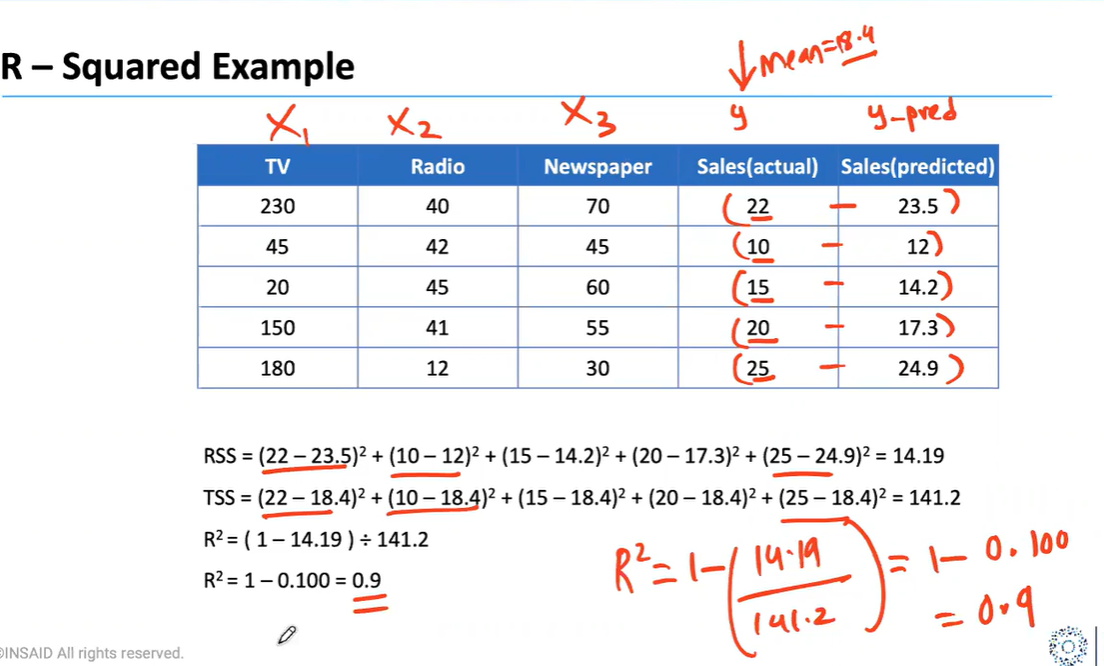

## Lets calculate Adjusted R^2

formula - [ 1 - [(1-R^2)(n-1)/n-p-1)] ]

In [66]:
X_train.shape   # n = 160 (rows), p = 3 (col)

(160, 3)

In [67]:
n = X_train.shape[0]   # As per formula let get n is count of Rows & p is count of columns
n

160

In [68]:
p = X_train.shape[1]
p

3

In [69]:
#Another way
# so p is no. of IV

# X_train.columns

In [70]:
# list(X_train.columns)

In [71]:
# p = len(list(X_train.columns))

In [72]:
num = (1-r2_score_train) * (n-1)
num

14.832871656672507

In [73]:
den = n-p-1
den

156

In [74]:
Adj_r2_score_train = 1- (num/den)
Adj_r2_score_train

0.9049174893803045

In [75]:
X_test.shape

(40, 3)

In [76]:
n = X_test.shape[0]
p = X_test.shape[1]

In [77]:
num_test = (1-r2_score_test) * (n-1)
num_test

5.455533778430311

In [78]:
den_test = n-p-1
den_test

36

In [79]:
Adj_r2_score_test = 1-(num_test/den_test)
Adj_r2_score_test

0.8484573950436025

This is the actual code from scratch calculating R^2 & Adj R^2
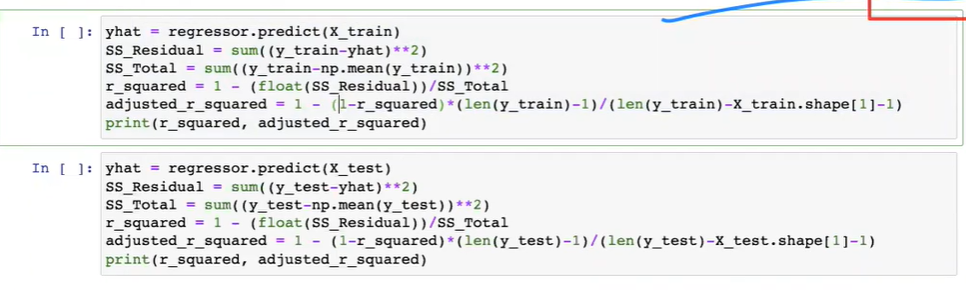

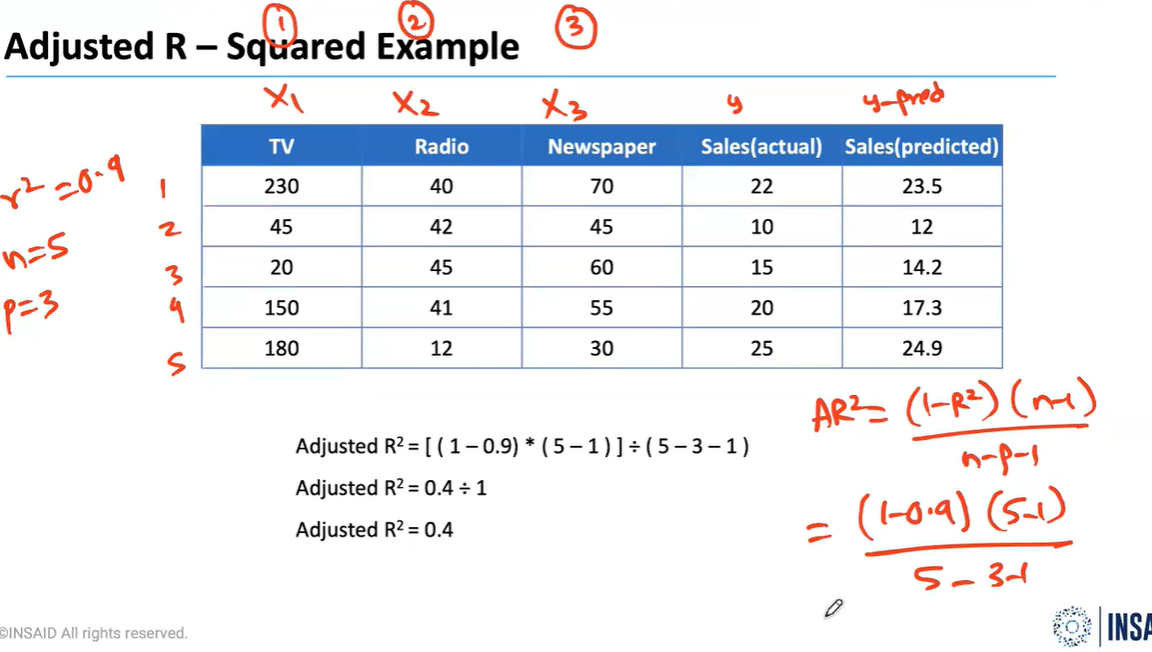

## Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.

- Let's check whether __"newspaper"__ improve the quality of our predictions or not.

To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.


In [80]:
feature_cols = ['TV','radio']                    # create a Python list of feature names
X = data[feature_cols]  
y = data['sales']

In [81]:
X.head()

TV  radio
1  230.1   37.8
2   44.5   39.3
3   17.2   45.9
4  151.5   41.3
5  180.8   10.8

In [82]:
X_train.head()

TV     radio  newspaper
135 -1.341553  1.035518   1.659411
67  -1.405314  0.082496  -1.306297
27  -0.089952  0.402439  -0.819809
114  0.697613 -0.189796  -0.908687
169  0.766097  0.014423   1.285189

#### Decision Tree Regressor

In [ ]:
# with basic model

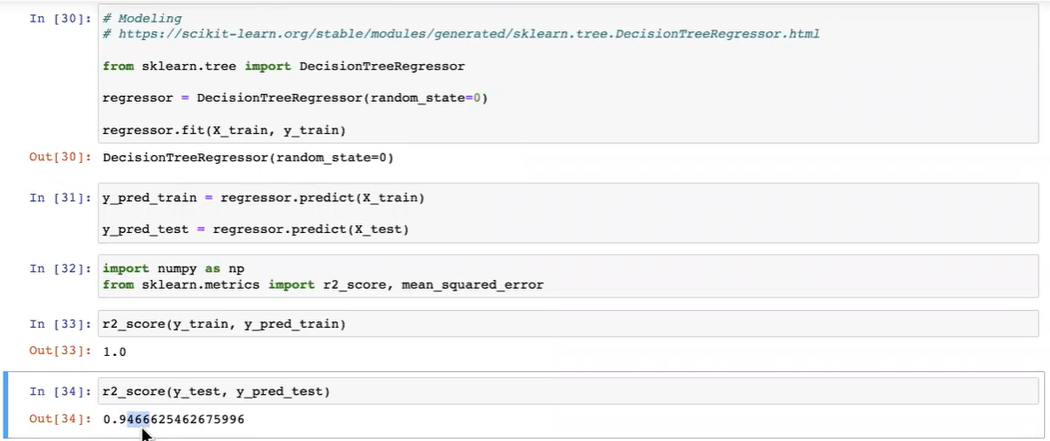

In [ ]:
# with grid search CV

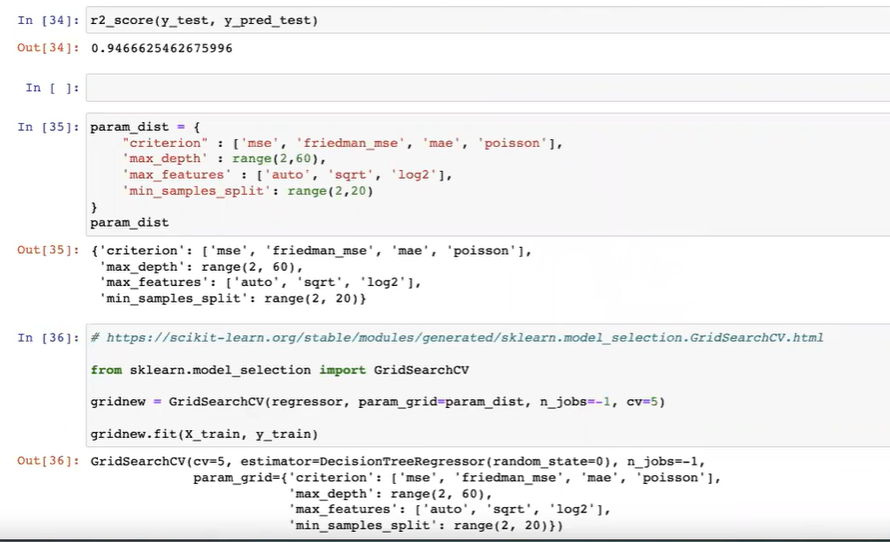

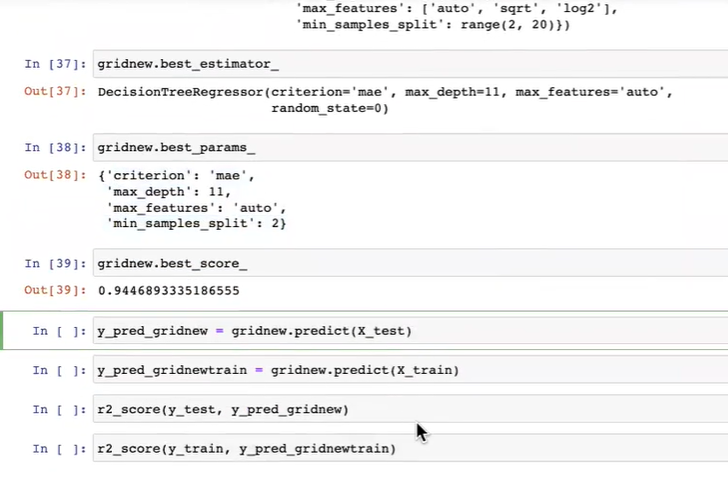

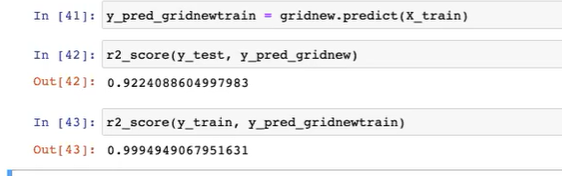

In [ ]:
# with above r2 score, our model shows its overfitting
